<a href="https://colab.research.google.com/github/sssiyam-sudo/MasterThesisWork/blob/main/dataset1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all the necessary libraries & packages.

In [ ]:
import os
import pandas as pd
import numpy as np
from math import sqrt
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn import preprocessing , metrics , model_selection
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.feature_selection import SelectKBest ,chi2
from sklearn.metrics import mean_squared_error , classification_report 

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold , ShuffleSplit

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ThesisWork/nsclc_pd1_msk_2018_clinical_data.tsv', sep='\t')

#-----------------
#-----------------
#-----------------

-------------------------------------
## **Data exploration and cleaning.**
-------------------------------------

In [ ]:
df.head()

,Study ID,Patient ID,Sample ID,Diagnosis Age,Cancer Type,Cancer Type Detailed,Durable Clinical Benefit,FGA,Fraction Genome Altered,Gene Panel,...,Oncotree Code,PD-L1 Score (%),Progress Free Survival (Months),Progression Free Status,Number of Samples Per Patient,Sex,Smoker,Somatic Status,TMB (nonsynonymous),Treatment Type
0,nsclc_pd1_msk_2018,P-0000012,P-0000012-T03-IM3,58,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,YES,0.18,0.1844,IMPACT341,...,LUAD,NaN,27.20,0:Not Progressed,1,Female,Ever,Matched,32.165504,Combination
1,nsclc_pd1_msk_2018,P-0000082,P-0000082-T01-IM3,60,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,YES,0.36,0.3606,IMPACT341,...,LUAD,100.0,14.50,1:Progressed,1,Male,Ever,Matched,1.109155,Monotherapy
2,nsclc_pd1_msk_2018,P-0000208,P-0000208-T01-IM3,68,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,NO,0.12,0.1173,IMPACT341,...,LUAD,3.0,4.17,1:Progressed,1,Female,Ever,Matched,2.218311,Monotherapy
3,nsclc_pd1_msk_2018,P-0000235,P-0000235-T01-IM3,77,Non-Small Cell Lung Cancer,Lung Squamous Cell Carcinoma,NO,0.24,0.2380,IMPACT341,...,LUSC,NaN,0.60,1:Progressed,1,Male,Ever,Matched,8.873242,Monotherapy
4,nsclc_pd1_msk_2018,P-0000299,P-0000299-T01-IM3,66,Non-Small Cell Lung Cancer,Large Cell Neuroendocrine Carcinoma,NO,0.01,0.0051,IMPACT341,...,LUNE,NaN,1.63,1:Progressed,1,Male,Ever,Matched,7.764087,Combination


In [ ]:
df.rename(columns = {'Study ID':'Study_ID', 'Patient ID':'Patient_ID',
                     'Sample ID':'Sample_ID' , 'Diagnosis Age':'Diagnosis_Age' ,
                     'Cancer Type':'Cancer_Type' , 'Cancer Type Detailed':'Cancer_Type_Detailed' ,
                     'Durable Clinical Benefit':'Durable_Clinical_Benefit' , 'FGA':'FGA' , 
                     'Fraction Genome Altered':'Fraction_Genome_Altered' , 'Gene Panel':'Gene_Panel',
                     'Lines of treatment':'Lines_of_treatment' , 'Mutation Count':'Mutation_Count' , 
                     'Mutation Rate':'Mutation_Rate' , 'Oncotree Code':'Oncotree_Code', 
                     'PD-L1 Score (%)':'PD-L1Score%' , 'Progress Free Survival (Months)':'ProgressFreeSurvival_Months' ,
                     'Progression Free Status':'ProgressionFreeStatus' ,
                     'Number of Samples Per Patient':'Number_of_Samples_Per_Patient' , 'Sex':'Gender' ,
                     'Smoker':'Smoker' , 'Somatic Status':'Somatic_Status' , 'TMB (nonsynonymous)':'TMB(nonsynonymous)',
                     'Treatment Type':'Treatment_Type'}, inplace = True)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Study_ID                       240 non-null    object 
 1   Patient_ID                     240 non-null    object 
 2   Sample_ID                      240 non-null    object 
 3   Diagnosis_Age                  240 non-null    int64  
 4   Cancer_Type                    240 non-null    object 
 5   Cancer_Type_Detailed           240 non-null    object 
 6   Durable_Clinical_Benefit       240 non-null    object 
 7   FGA                            240 non-null    float64
 8   Fraction_Genome_Altered        240 non-null    float64
 9   Gene_Panel                     240 non-null    object 
 10  IRB                            240 non-null    object 
 11  Lines_of_treatment             240 non-null    int64  
 12  Mutation_Count                 240 non-null    int

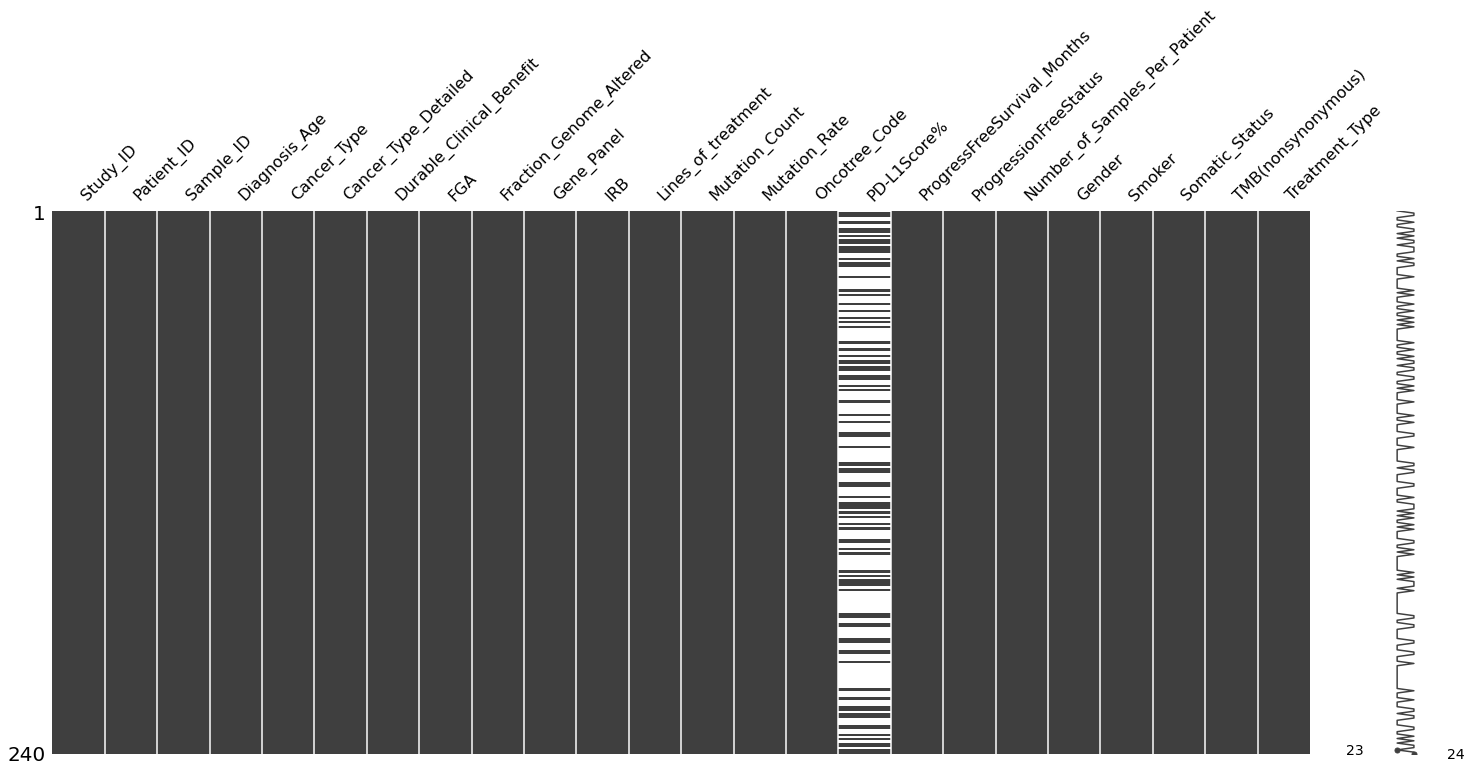

In [ ]:
msno.matrix(df)

In [ ]:
df.drop(df.columns[15], axis=1, inplace=True) #dropping the column with null value in it.

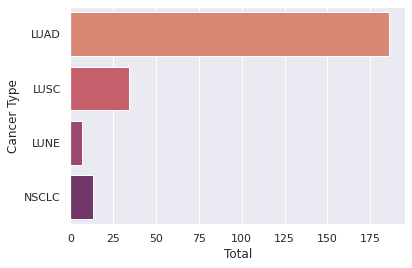

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(y="Oncotree_Code", data=df, palette="flare")
plt.ylabel('Cancer Type')
plt.xlabel('Total')
plt.show()

Number of cases: 240
Distribution:
LUAD     186
LUSC      34
NSCLC     13
LUNE       7
Name: Oncotree_Code, dtype: int64


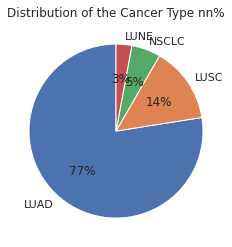

In [ ]:
#Basic info about data
print("Number of cases:", len(df))
print("Distribution:")
print(df.Oncotree_Code.value_counts())
plt.pie(list(df.Oncotree_Code.value_counts()/len(df.Oncotree_Code)), startangle=90, labels = ['LUAD', 'LUSC','NSCLC','LUNE'] ,autopct='%1.0f%%')
plt.title('Distribution of the Cancer Type nn%')
plt.show()

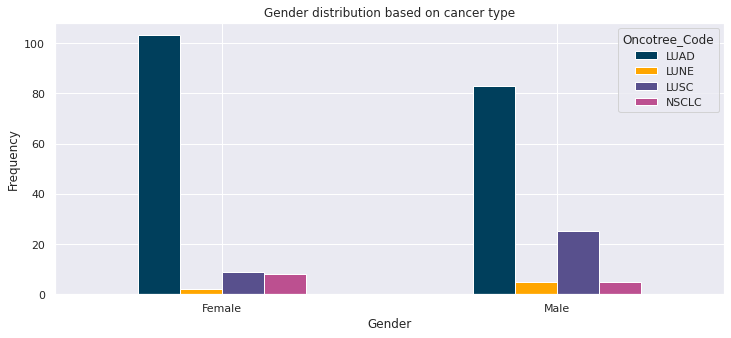

In [ ]:
pd.crosstab(df.Gender,df.Oncotree_Code).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('Gender distribution based on cancer type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


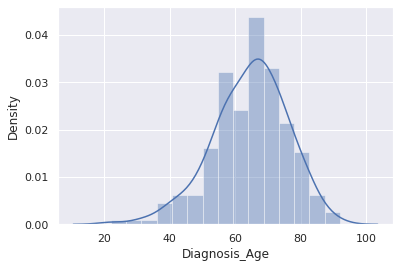

In [ ]:
sns.distplot(df['Diagnosis_Age']);

In [ ]:
df.groupby(['Oncotree_Code','Treatment_Type','Durable_Clinical_Benefit'])['Durable_Clinical_Benefit'].count()

Oncotree_Code  Treatment_Type  Durable_Clinical_Benefit
LUAD           Combination     NE                            1
                               NO                           12
                               YES                          14
               Monotherapy     NE                            6
                               NO                          112
                               YES                          41
LUNE           Combination     NE                            1
                               NO                            1
                               YES                           1
               Monotherapy     NO                            4
LUSC           Combination     NO                            3
               Monotherapy     NE                            3
                               NO                           19
                               YES                           9
NSCLC          Combination     YES                           1

#-----------------
#-----------------
#-----------------

----------------------------
# **FEATURE** **SELECTION.**
----------------------------

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/ThesisWork/nsclc_pd1_msk_2018_clinical_data.tsv', sep='\t')

In [ ]:
df2.rename(columns = {'Study ID':'Study_ID', 'Patient ID':'Patient_ID',
                     'Sample ID':'Sample_ID' , 'Diagnosis Age':'Diagnosis_Age' ,
                     'Cancer Type':'Cancer_Type' , 'Cancer Type Detailed':'Cancer_Type_Detailed' ,
                     'Durable Clinical Benefit':'Durable_Clinical_Benefit' , 'FGA':'FGA' , 
                     'Fraction Genome Altered':'Fraction_Genome_Altered' , 'Gene Panel':'Gene_Panel',
                     'Lines of treatment':'Lines_of_treatment' , 'Mutation Count':'Mutation_Count' , 
                     'Mutation Rate':'Mutation_Rate' , 'Oncotree Code':'Oncotree_Code', 
                     'PD-L1 Score (%)':'PD-L1Score%' , 'Progress Free Survival (Months)':'ProgressFreeSurvival_Months' ,
                     'Progression Free Status':'ProgressionFreeStatus' ,
                     'Number of Samples Per Patient':'Number_of_Samples_Per_Patient' , 'Sex':'Gender' ,
                     'Smoker':'Smoker' , 'Somatic Status':'Somatic_Status' , 'TMB (nonsynonymous)':'TMB(nonsynonymous)',
                     'Treatment Type':'Treatment_Type'}, inplace = True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Study_ID                       240 non-null    object 
 1   Patient_ID                     240 non-null    object 
 2   Sample_ID                      240 non-null    object 
 3   Diagnosis_Age                  240 non-null    int64  
 4   Cancer_Type                    240 non-null    object 
 5   Cancer_Type_Detailed           240 non-null    object 
 6   Durable_Clinical_Benefit       240 non-null    object 
 7   FGA                            240 non-null    float64
 8   Fraction_Genome_Altered        240 non-null    float64
 9   Gene_Panel                     240 non-null    object 
 10  IRB                            240 non-null    object 
 11  Lines_of_treatment             240 non-null    int64  
 12  Mutation_Count                 240 non-null    int

In [ ]:
df2.drop(df2.columns[[0,1,2,4,5,15]], axis=1, inplace=True) #dropping the columns that have no impact.

In [ ]:
# initializing sklearn labelencoder
label_encoder = preprocessing.LabelEncoder()

cols = ['Durable_Clinical_Benefit','Gene_Panel','IRB','ProgressionFreeStatus','Gender','Smoker','Somatic_Status','Treatment_Type']
# sklearn labelencoder
df2[cols] = df2[cols].apply(preprocessing.LabelEncoder().fit_transform)
X2 = df2.drop(["Oncotree_Code"], axis=1)
y2 = df2["Oncotree_Code"]

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X2,y2)

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X2.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns

print(featureScores.nlargest(20,'Score'))  #print 10 best features

                          Feature      Score
15             TMB(nonsynonymous)  18.404082
7                  Mutation_Count  16.283650
8                   Mutation_Rate  15.880111
12                         Gender   5.893884
13                         Smoker   4.556381
0                   Diagnosis_Age   3.646101
6              Lines_of_treatment   3.521684
4                      Gene_Panel   2.548109
9     ProgressFreeSurvival_Months   2.355921
2                             FGA   1.280834
3         Fraction_Genome_Altered   1.259834
10          ProgressionFreeStatus   0.970589
16                 Treatment_Type   0.850522
5                             IRB   0.746918
1        Durable_Clinical_Benefit   0.556983
11  Number_of_Samples_Per_Patient   0.000000


In [ ]:
#Finally we will keep only the columns that have the bigger impacts on the target.
df.drop(df.columns[[0,1,2,4,5,6,7,8,9,10,15,16,17,20,22]], axis=1, inplace=True)

#----------------------------------------------------
#----------------------------------------------------
#----------------------------------------------------

-------------------------------
# **Classification** **Models.**
-------------------------------

**Splitting the dataset in train and test set.**

In [ ]:
df = df.sample(frac=1) #this will randomly shuffle the rows to make sure the data is not sorted.

In [ ]:
X = df.drop(["Oncotree_Code"], axis=1)
y = df["Oncotree_Code"] #This will be our target to predict.

In [ ]:
X = pd.get_dummies(X) #One Hot Encoding 
# initializing sklearn labelencoder
label_encoder = preprocessing.LabelEncoder()
cols = ['Oncotree_Code']
# sklearn labelencoder
df[cols] = df[cols].apply(preprocessing.LabelEncoder().fit_transform)
y = df["Oncotree_Code"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.21, shuffle = True, random_state = 0)

In [ ]:
print(f"TRAINING DATA: {X_train.shape[0]}\nTESTING DATA: {X_test.shape[0]}" )

TRAINING DATA: 189
TESTING DATA: 51


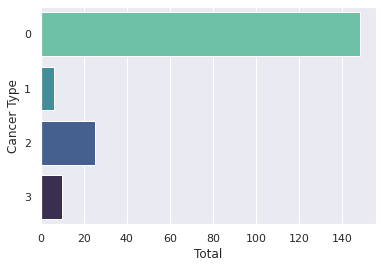

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data= X_train, palette="mako_r")
plt.ylabel('Cancer Type')
plt.xlabel('Total')
plt.show()

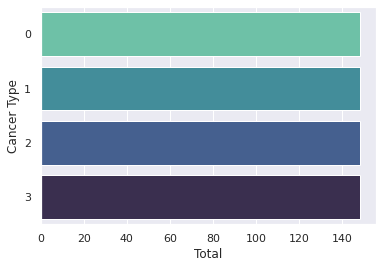

In [ ]:
X_train_2, y_train_2 = SMOTE().fit_resample(X_train, y_train)
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train_2, data= X_train_2, palette="mako_r")
plt.ylabel('Cancer Type')
plt.xlabel('Total')
plt.show()

Logisctic Regression

In [ ]:
LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))


LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.75      1.00      0.85        38
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         3

    accuracy                           0.75        51
   macro avg       0.19      0.25      0.21        51
weighted avg       0.56      0.75      0.64        51

[[38  0  0  0]
 [ 1  0  0  0]
 [ 9  0  0  0]
 [ 3  0  0  0]]
Logistic Regression accuracy is: 74.51%


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree

In [ ]:
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=10)
DTclassifier.fit(X_train, y_train)

y_pred = DTclassifier.predict(X_test)
print(classification_report(y_test, y_pred))

DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85        38
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         3

    accuracy                           0.73        51
   macro avg       0.19      0.24      0.21        51
weighted avg       0.56      0.73      0.63        51

Decision Tree accuracy is: 72.55%


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest

In [ ]:
RFclassifier = RandomForestClassifier(max_leaf_nodes=10)
                                      
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)
print(classification_report(y_test, y_pred))

RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

           0       0.75      1.00      0.85        38
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         3

    accuracy                           0.75        51
   macro avg       0.19      0.25      0.21        51
weighted avg       0.56      0.75      0.64        51

Random Forest accuracy is: 74.51%


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Support Vector Machine

In [ ]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)
print(classification_report(y_test, y_pred))

SVMAcc = accuracy_score(y_pred,y_test)
print('SVM accuracy is: {:.2f}%'.format(SVMAcc*100))


              precision    recall  f1-score   support

           0       0.75      1.00      0.85        38
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         3

    accuracy                           0.75        51
   macro avg       0.19      0.25      0.21        51
weighted avg       0.56      0.75      0.64        51

SVM accuracy is: 74.51%


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K-nearest neighbours

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

KNNAccuracy = accuracy_score(y_pred,y_test)
print('KNN accuracy is: {:.2f}%'.format(KNNAccuracy*100))

              precision    recall  f1-score   support

           0       0.74      0.97      0.84        38
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         3

    accuracy                           0.73        51
   macro avg       0.18      0.24      0.21        51
weighted avg       0.55      0.73      0.63        51

KNN accuracy is: 72.55%


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#---------------------
#---------------------
#---------------------

------------------------------------------
**K-fold cross validation of each model.**
------------------------------------------

In [ ]:
kfold = model_selection.KFold(n_splits=5)
model_kfold = LogisticRegression(max_iter=5000)
results_kfold_LR = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)

kfold = model_selection.KFold(n_splits=5)
model_kfold = DecisionTreeClassifier(max_leaf_nodes=3)
results_kfold_DT = model_selection.cross_val_score(model_kfold, X, y, cv=kfold) 

kfold = model_selection.KFold(n_splits=5)
model_kfold = RandomForestClassifier(max_leaf_nodes=30)
results_kfold_RF = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)

kfold = model_selection.KFold(n_splits=5)
model_kfold = SVC(kernel='linear')
results_kfold_SVM = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)

kfold = model_selection.KFold(n_splits=5)
model_kfold = KNeighborsClassifier(n_neighbors=5)
results_kfold_KNN = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)

print("Logistic Regression's Kfold CV Accuracy: %.2f%%" % (results_kfold_LR.mean()*100.0))  
print("Decision Tree's Kfold CV Accuracy: %.2f%%" % (results_kfold_DT.mean()*100.0)) 
print("Random Forest's Kfold CV Accuracy: %.2f%%" % (results_kfold_RF.mean()*100.0)) 
print("Support Vector's Kfold CV Accuracy: %.2f%%" % (results_kfold_SVM.mean()*100.0))
print("K-nearest Neighbour's Kfold CV Accuracy: %.2f%%" % (results_kfold_KNN.mean()*100.0)) 

Logistic Regression's Kfold CV Accuracy: 77.50%
Naive Byes's Kfold CV Accuracy: 20.42%
Decision Tree's Kfold CV Accuracy: 76.25%
Random Forest's Kfold CV Accuracy: 74.17%
Support Vector's Kfold CV Accuracy: 77.50%
K-nearest Neighbour's Kfold CV Accuracy: 75.83%


In [ ]:
#@title
classifier = ['LR','DT' , 'RF' ,'SVM' , 'KNN']
accuracy = [77.50,76.25,74.17,77.50,75.83]
d = {'Classifiers':classifier,'Accuracy':accuracy}
scores = pd.DataFrame(d)
scores

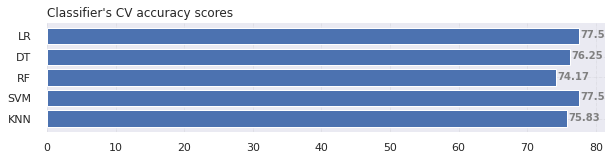

In [ ]:
#@title
# Figure Size
fig, ax = plt.subplots(figsize =(10, 2))
 
# Horizontal Bar Plot
ax.barh(classifier, accuracy)
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
# Add Plot Title
ax.set_title("Classifier's CV accuracy scores",
             loc ='left', )
# Show Plot
plt.show() 